### Image

In [47]:
import glob
import tiffile as tf
import matplotlib.pyplot as plt 
import imageio.v3 as iio
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import numpy as np

In [27]:
img_dir = '/mnt/aperto/mxia/annotation/'

In [33]:
img_files = sorted(glob.glob(f'{img_dir}*_img.tif'))
mask_files = sorted(glob.glob(f'{img_dir}*mask*.tif'))
img_id = [item.split('/')[-1][:4] for item in img_files]
int_id =[int(item) for item in img_id] 

#### check image and mask

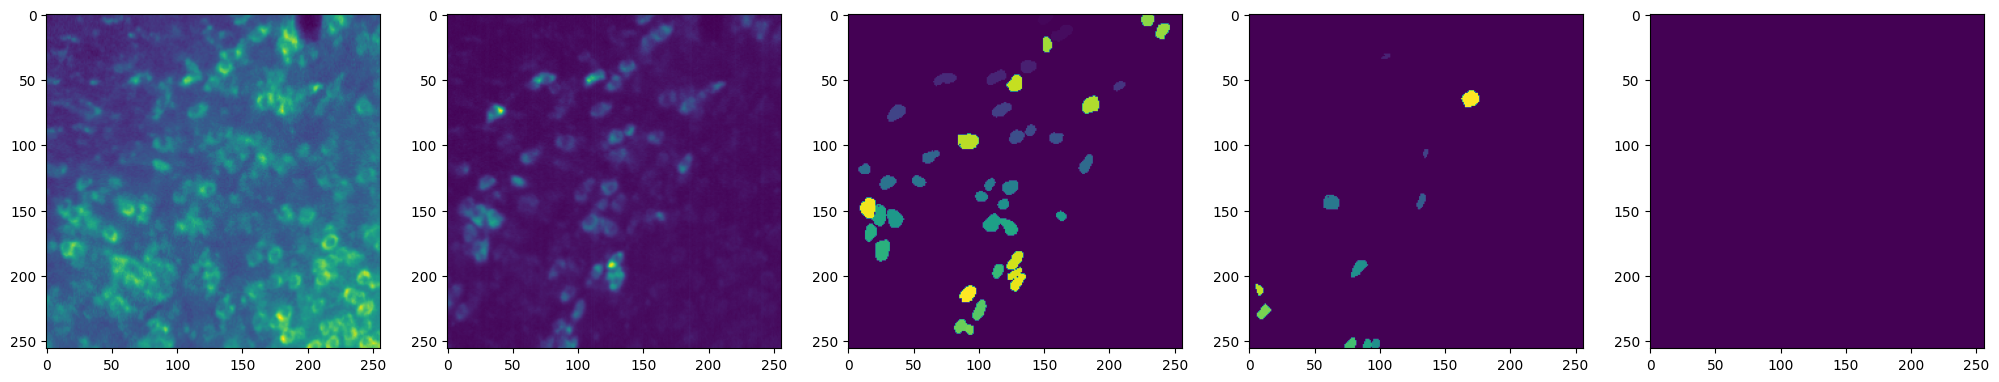

In [57]:
fig, ax = plt.subplots(1,5, figsize = (25,5))
check_id = 1
img = img_files[check_id]
mask = mask_files[3*check_id:3*(check_id+1)]
ax[0].imshow(tf.imread(img)[0])
ax[1].imshow(tf.imread(img)[1])
ax[2].imshow(tf.imread(mask[0]))
ax[3].imshow(tf.imread(mask[1]))
ax[4].imshow(tf.imread(mask[2]))

In [104]:
import cv2

image = cv2.imreadmulti(img)[1][1]

alpha = 2 # Contrast control (1.0-3.0)
beta = 100 # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

#cv2.imshow('original', image)
# cv2.imshow('adjusted', adjusted)
# cv2.waitKey()

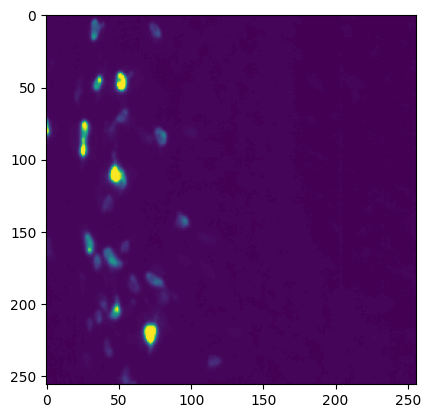

In [106]:
plt.imshow(adjusted)

In [98]:
image

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

before norm [  161   162   164 ... 64965 65500 65535]
after norm [-0.19799362 -0.19749779 -0.19650614 ... 31.93356324 32.19883056
 32.21618449]
PDF saved successfully.


/tmp/ipykernel_3320920/1387859437.py:3: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed in 3.10.
  with PdfPages('check_images.pdf') as pdf:


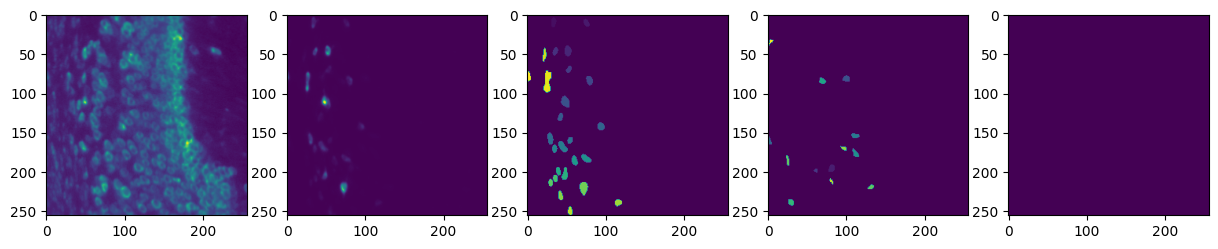

In [107]:

# Create a PdfPages object to save the figures

with PdfPages('check_images.pdf') as pdf:
    for check_id in int_id:
        img = img_files[check_id]
        # Normalize the second channel of the image to 0-1
        img_1 = tf.imread(img)[1]
        min_val = np.min(img_1)
        max_val = np.max(img_1)
        mean = np.mean(img_1)
        std = np.std(img_1)
        print('before norm', np.unique(img_1))
        normalized_img = (img_1 - mean) / std
        brigter = normalized_img+100

        
        mask = mask_files[3*check_id:3*(check_id+1)]
        print('after norm', np.unique(normalized_img))
        # Create a figure with subplots
        fig, ax = plt.subplots(1, 5, figsize=(15, 5))
        
        # Display the images
        ax[0].imshow(iio.imread(img)[0])
        ax[1].imshow(normalized_img)
        ax[2].imshow(iio.imread(mask[0]))
        ax[3].imshow(iio.imread(mask[1]))
        ax[4].imshow(iio.imread(mask[2]))
        break
        # Set titles for each subplot
        ax[0].set_title(f'Image {check_id} - Channel 0')
        ax[1].set_title(f'Image {check_id} - Channel 1')
        ax[2].set_title(f'{check_id} Mask 1')
        ax[3].set_title(f'{check_id} Mask 2')
        ax[4].set_title(f'{check_id} Mask 3')
        
        # Remove axis labels
        for a in ax:
            a.axis('off')
        
        # Adjust layout
        plt.tight_layout()
        
        # Save the current figure into the PDF
        pdf.savefig(fig)
        
        # Close the figure to free memory
        plt.close(fig)

print("PDF saved successfully.")


### Pickle

In [44]:
with open('/mnt/aperto/mxia/annotation/info.pkl', 'rb') as f:
    check_data = pickle.load(f)

In [45]:
check_data

,ID,integer_ID,instance_counts,corner,source,ref_channel,channel,crop_size,isHard,plane_position,select_plane
0,0000,0,26,"[1061, 4601, 560]",/mnt/ampa02_data01/tmurakami/240417_whole_4col...,3,1,"[100, 256, 256]",0,24,True
1,0001,1,42,"[1325, 3350, 1543]",/mnt/ampa02_data01/tmurakami/240417_whole_4col...,3,1,"[100, 256, 256]",0,25,True
2,0002,2,7,"[1356, 517, 1669]",/mnt/ampa02_data01/tmurakami/240417_whole_4col...,3,1,"[100, 256, 256]",0,52,True
3,0003,3,8,"[1354, 566, 3633]",/mnt/ampa02_data01/tmurakami/240417_whole_4col...,3,1,"[100, 256, 256]",0,42,True
